# <i>CODE-JAMMIN'

---

### Wel'll start with a base datset:

In [12]:
data = pd.read_csv('admissions.csv')
data[:10]

,Unnamed: 0,admit,gpa,gre
0,0,0,3.177277,594.102992
1,1,0,3.412655,631.528607
2,2,0,2.728097,553.714399
3,3,0,3.093559,551.089985
4,4,0,3.141923,537.184894
5,5,0,3.599108,442.763567
6,6,0,3.238972,667.472189
7,7,0,3.420177,561.713905
8,8,0,3.562482,590.340371
9,9,0,3.910495,463.470183


#### Clean up the extra column: 'Unnamed: 0'

In [13]:
data = data.drop('Unnamed: 0',axis=1)

In [14]:
data[:10]

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894
5,0,3.599108,442.763567
6,0,3.238972,667.472189
7,0,3.420177,561.713905
8,0,3.562482,590.340371
9,0,3.910495,463.470183


---

#### Lets generate some unique names:

In [15]:
name_list = []

def name_generator(start,stop):
    length = random.choice(range(start,stop))
    letters = []
    letters.append(random.choice(string.ascii_uppercase))
    for x in range(length):
        letters.append(random.choice(string.ascii_lowercase))
    return "".join(letters)

while len(name_list) < len(data):
    name = name_generator(3,7)
    if name not in name_list:
        name_list.append(name)

data['name'] = name_list

In [16]:
data[:5]

,admit,gpa,gre,name
0,0,3.177277,594.102992,Nnjgj
1,0,3.412655,631.528607,Kbdiyv
2,0,2.728097,553.714399,Ldikcw
3,0,3.093559,551.089985,Yluuwc
4,0,3.141923,537.184894,Lizbshm


In [17]:
data = data.reindex(columns=['name','gpa','gre','admit'])
data[:5]

,name,gpa,gre,admit
0,Nnjgj,3.177277,594.102992,0
1,Kbdiyv,3.412655,631.528607,0
2,Ldikcw,2.728097,553.714399,0
3,Yluuwc,3.093559,551.089985,0
4,Lizbshm,3.141923,537.184894,0


In [18]:
gpa = data[['name','gpa','admit']]
gpa[:5]

,name,gpa,admit
0,Nnjgj,3.177277,0
1,Kbdiyv,3.412655,0
2,Ldikcw,2.728097,0
3,Yluuwc,3.093559,0
4,Lizbshm,3.141923,0


In [19]:
gre = data[['name','gre','admit']]

In [20]:
gre[:5]

,name,gre,admit
0,Nnjgj,594.102992,0
1,Kbdiyv,631.528607,0
2,Ldikcw,553.714399,0
3,Yluuwc,551.089985,0
4,Lizbshm,537.184894,0


> Check for dupes:

In [21]:
[x for x in data['name'].duplicated() if x == True]

[]

---

#### SQL INTERLUDE:

In [22]:
import sqlite3
conn = sqlite3.connect('admissions.db')
gpa[1:].to_sql('gpa',conn,flavor='sqlite',if_exists='replace',index=False)
gre[1:].to_sql('gre',conn,flavor='sqlite',if_exists='replace',index=False)

In [23]:
query = '''
SELECT * FROM sqlite_master;
'''
pd.read_sql(query,conn)

,type,name,tbl_name,rootpage,sql
0,table,gpa,gpa,2,"CREATE TABLE ""gpa"" (\n""name"" TEXT,\n ""gpa"" RE..."
1,table,gre,gre,4,"CREATE TABLE ""gre"" (\n""name"" TEXT,\n ""gre"" RE..."


In [24]:
query = '''
PRAGMA TABLE_INFO(gpa);
'''
pd.read_sql(query,conn)

,cid,name,type,notnull,dflt_value,pk
0,0,name,TEXT,0,None,0
1,1,gpa,REAL,0,None,0
2,2,admit,INTEGER,0,None,0


In [25]:
query = '''
SELECT * FROM gpa
LIMIT 5;
'''
pd.read_sql(query,conn)

,name,gpa,admit
0,Kbdiyv,3.412655,0
1,Ldikcw,2.728097,0
2,Yluuwc,3.093559,0
3,Lizbshm,3.141923,0
4,Lybsoma,3.599108,0


In [26]:
query = '''
SELECT * FROM gre
LIMIT 5;
'''
pd.read_sql(query,conn)

,name,gre,admit
0,Kbdiyv,631.528607,0
1,Ldikcw,553.714399,0
2,Yluuwc,551.089985,0
3,Lizbshm,537.184894,0
4,Lybsoma,442.763567,0


In [27]:
query = '''
SELECT gpa.name,gpa.gpa,gre.gre,gpa.admit FROM gpa
JOIN gre ON gpa.name = gre.name
LIMIT 5
;
'''
pd.read_sql(query,conn)

,name,gpa,gre,admit
0,Kbdiyv,3.412655,631.528607,0
1,Ldikcw,2.728097,553.714399,0
2,Yluuwc,3.093559,551.089985,0
3,Lizbshm,3.141923,537.184894,0
4,Lybsoma,3.599108,442.763567,0


In [28]:
query1 = '''
SELECT * FROM gpa
'''

query2 = '''
SELECT * FROM gre
'''

gpa_1 = pd.read_sql(query1,conn)
gre_1 = pd.read_sql(query2,conn) 

In [29]:
gpa_1[:5]

,name,gpa,admit
0,Kbdiyv,3.412655,0
1,Ldikcw,2.728097,0
2,Yluuwc,3.093559,0
3,Lizbshm,3.141923,0
4,Lybsoma,3.599108,0


In [30]:
gre_1[:5]

,name,gre,admit
0,Kbdiyv,631.528607,0
1,Ldikcw,553.714399,0
2,Yluuwc,551.089985,0
3,Lizbshm,537.184894,0
4,Lybsoma,442.763567,0


### JOIN-BACK A PANDAS DATAFRAME:

In [31]:
merged_df = gpa_1.merge(gre_1[['name','gre']],on='name')
merged_df = merged_df.reindex(columns=('name','gpa','gre','admit'))

merged_df.ix[1][0]

u'Ldikcw'

---

### DATA CLASS FUNK

In [32]:
merged_df[:1]

,name,gpa,gre,admit
0,Kbdiyv,3.412655,631.528607,0


In [33]:
class Prospect():
    def __init__(self,row):
        self.name = str(row[0])
        self.gpa = str(row[1])
        self.gre = str(row[2])
        self.admit = str(row[3])
        
    def name_length(self):
        return len(self.name)
        
Prospectus1 = Prospect(merged_df.ix[0])
Prospectus2 = Prospect(merged_df.ix[1])
Prospectus3 = Prospect(merged_df.ix[2])

print(Prospectus1.name,
      Prospectus1.name_length(),
      Prospectus1.gpa,
      Prospectus1.gre,
      Prospectus1.admit)

print(Prospectus2.name,
      Prospectus2.name_length(),
      Prospectus2.gpa,
      Prospectus2.gre,
      Prospectus2.admit)

print(Prospectus3.name,
      Prospectus3.name_length(),
      Prospectus3.gpa,
      Prospectus3.gre,
      Prospectus3.admit)

('Kbdiyv', 6, '3.412655', '631.528607', '0')
('Ldikcw', 6, '2.728097', '553.714399', '0')
('Yluuwc', 6, '3.093559', '551.089985', '0')


---

#### ANDROID STORAGE FACILITY:

In [34]:
Android_Storage_Facility = []

In [35]:
for x in range(len(merged_df)):
    Android_Storage_Facility.append(Prospect(merged_df.ix[x]))

In [36]:
Android_Storage_Facility[:10]

[<__main__.Prospect instance at 0x10b3b8ef0>,
 <__main__.Prospect instance at 0x10b3b8908>,
 <__main__.Prospect instance at 0x10b3b89e0>,
 <__main__.Prospect instance at 0x10b3b8a70>,
 <__main__.Prospect instance at 0x10b3b8f38>,
 <__main__.Prospect instance at 0x10b3b88c0>,
 <__main__.Prospect instance at 0x10b3b8950>,
 <__main__.Prospect instance at 0x10b3b85f0>,
 <__main__.Prospect instance at 0x10b3b2290>,
 <__main__.Prospect instance at 0x10b3b22d8>]

In [37]:
[('Android ID: %s') % (x.name) for x in Android_Storage_Facility[:10]] 

['Android ID: Kbdiyv',
 'Android ID: Ldikcw',
 'Android ID: Yluuwc',
 'Android ID: Lizbshm',
 'Android ID: Lybsoma',
 'Android ID: Hwcbbz',
 'Android ID: Oznu',
 'Android ID: Ourdv',
 'Android ID: Girz',
 'Android ID: Woizkd']

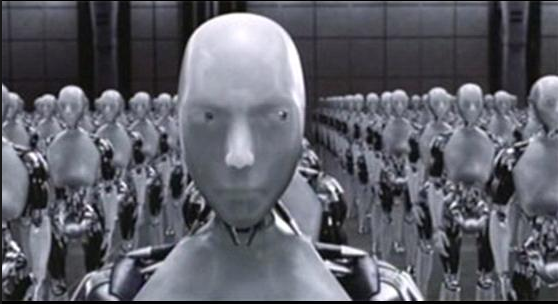

In [38]:
from IPython.display import Image
Image(filename='Android_Storage.png')

---

### <u>DATA-CRUSH EXPERIMENT:

#### Lets work with a funky subset of the data and learn to manipulate it...

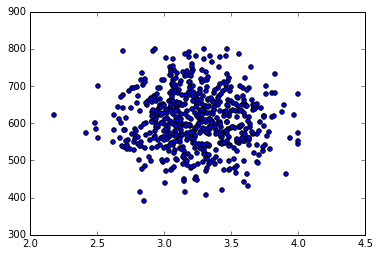

In [39]:
plt.scatter(merged_df['gpa'],merged_df['gre'])

><b>lets find the center of the data:

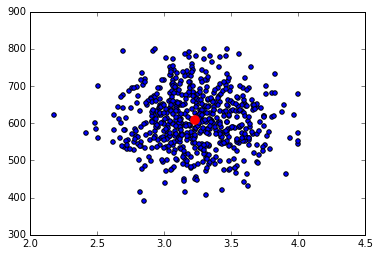

In [40]:
x = np.mean(data['gpa'])
y = np.mean(data['gre'])

plt.scatter(data['gpa'],data['gre'])
plt.scatter(x,y,color='r',s=75)

In [41]:
data_zip = zip(data['gpa'],data['gre'])
data_zip[:5]

[(3.1772770000000001, 594.10299199999997),
 (3.4126550000000004, 631.52860700000008),
 (2.728097, 553.71439900000007),
 (3.0935589999999999, 551.08998499999996),
 (3.1419229999999998, 537.18489399999999)]

In [42]:
def data_crush(data_zip,factor):

    new_points = []

    center_x = np.mean(data['gpa'])
    center_y = np.mean(data['gre'])

    for point in data_zip:
        distance_x = (center_x - point[0])/(factor)
        distance_y = (center_y - point[1])/(factor)
    
        new_point_x = center_x - distance_x
        new_point_y = center_y - distance_y

        new_points.append([new_point_x,new_point_y])
    
    return new_points

data_crush(data_zip,3)[:5]

[[3.2128319362174151, 603.80369465890169],
 [3.2912912695507486, 616.27889965890176],
 [3.0631052695507486, 590.34083032556839],
 [3.1849259362174149, 589.46602565890169],
 [3.2010472695507484, 584.83099532556832]]

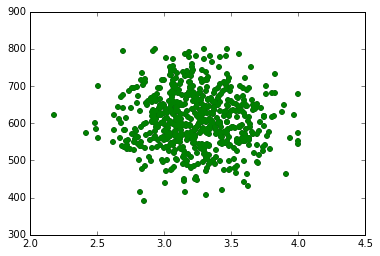

In [43]:
bang = data_crush(data_zip,1)
plt.scatter(data['gpa'],data['gre'])
plt.scatter([x[0] for x in bang],[x[1] for x in bang],color='g')
plt.show()

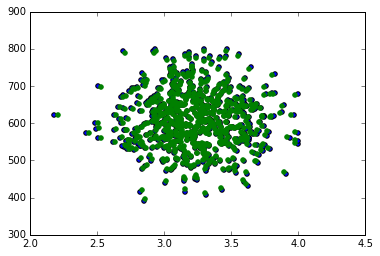

In [44]:
bang = data_crush(data_zip,1.03)
plt.scatter(data['gpa'],data['gre'])
plt.scatter([x[0] for x in bang],[x[1] for x in bang],color='g')
plt.show()

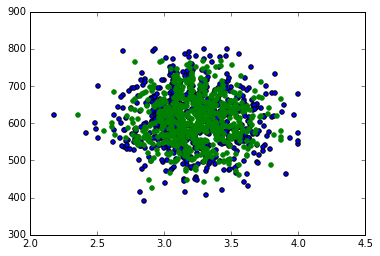

In [45]:
bang = data_crush(data_zip,1.2)
plt.scatter(data['gpa'],data['gre'])
plt.scatter([x[0] for x in bang],[x[1] for x in bang],color='g')
plt.show()

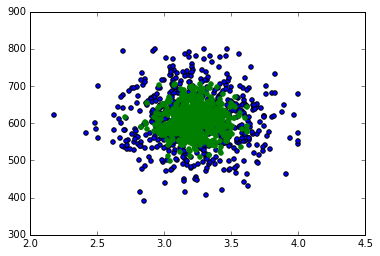

In [46]:
bang = data_crush(data_zip,2)
plt.scatter(data['gpa'],data['gre'])
plt.scatter([x[0] for x in bang],[x[1] for x in bang],color='g')
plt.show()

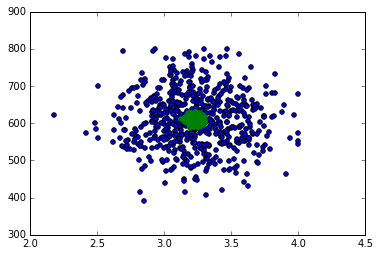

In [47]:
bang = data_crush(data_zip,10)
plt.scatter(data['gpa'],data['gre'])
plt.scatter([x[0] for x in bang],[x[1] for x in bang],color='g')
plt.show()

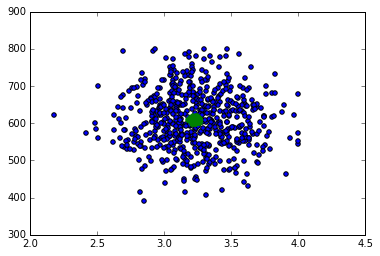

In [48]:
bang = data_crush(data_zip,20)
plt.scatter(data['gpa'],data['gre'])
plt.scatter([x[0] for x in bang],[x[1] for x in bang],color='g')
plt.show()

>><b>I'm not a playa I just data-crush alot

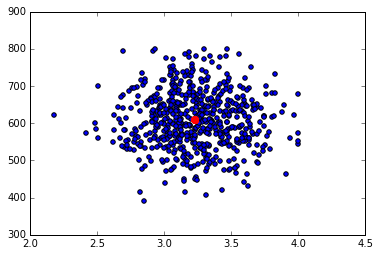

In [53]:
bang = data_crush(data_zip,100)
plt.scatter(data['gpa'],data['gre'])
plt.scatter([x[0] for x in bang],[x[1] for x in bang],color='r')
plt.show()

---

#### LETS ACTUALLY EXPLORE THE DATA

In [54]:
merged_df[:10]

,name,gpa,gre,admit
0,Kbdiyv,3.412655,631.528607,0
1,Ldikcw,2.728097,553.714399,0
2,Yluuwc,3.093559,551.089985,0
3,Lizbshm,3.141923,537.184894,0
4,Lybsoma,3.599108,442.763567,0
5,Hwcbbz,3.238972,667.472189,0
6,Oznu,3.420177,561.713905,0
7,Ourdv,3.562482,590.340371,0
8,Girz,3.910495,463.470183,0
9,Woizkd,3.264341,636.453166,0


In [55]:
merged_df.describe()[['gpa','gre']]

,gpa,gre
count,600.000000,600.000000
mean,3.230698,608.678298
std,0.290020,75.980121
min,2.177100,390.363563
25%,3.040984,557.209748
50%,3.228005,605.492653
75%,3.434685,658.361407
max,4.000000,800.000000


In [56]:
print('median:',np.median(merged_df['gpa']),np.median(merged_df['gre']))

('median:', 3.228005, 605.49265300000002)


##### modes:

In [176]:
Counter(merged_df['gpa']).most_common()[0]

(4.0, 3)

In [177]:
Counter(merged_df['gre']).most_common()[0]

(800.0, 3)

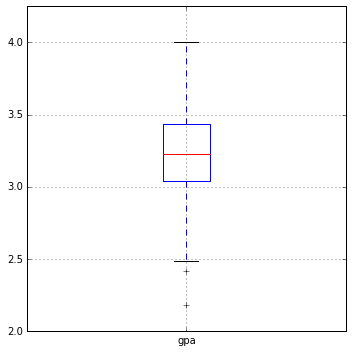

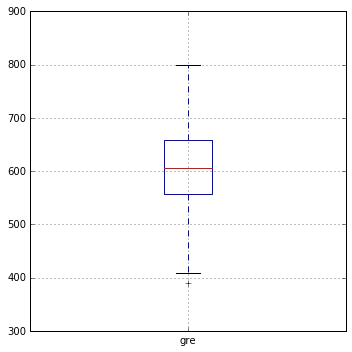

In [179]:
merged_df[['gpa']].plot(kind='box',figsize=(5,5),ylim=(2,4.25),grid=True)
merged_df[['gre']].plot(kind='box',figsize=(5,5),ylim=(300,900),grid=True)

----

### CODEX:

In [174]:
from __future__ import division
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as sp
%matplotlib inline
import random
import string
import pandas as pd
import numpy as np

---